In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mlxtend.data import mnist_data
from skimage import io, transform, color
from skimage.feature import graycomatrix 

%matplotlib widget


In [5]:
X, y = mnist_data()

print('Dimensions: %s x %s' % (X.shape[0], X.shape[1]))
print('1st row', X[0])

Dimensions: 5000 x 784
1st row [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.  51. 159. 253. 159.  50.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  48. 238. 252. 252. 252. 237.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  54.
 227. 253. 252. 239. 233. 252.  57.   6.   0. 

In [6]:
print('Classes: Setosa, Versicolor, Virginica')
print(np.unique(y))
print('Class distribution: %s' % np.bincount(y))

Classes: Setosa, Versicolor, Virginica
[0 1 2 3 4 5 6 7 8 9]
Class distribution: [500 500 500 500 500 500 500 500 500 500]


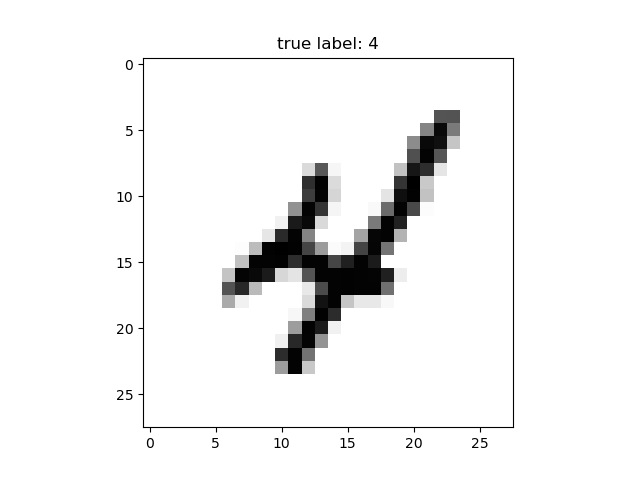

In [7]:
def plot_digit(X, y, idx):
    img = X[idx].reshape(28,28)
    plt.figure()
    plt.imshow(img, cmap='Greys',  interpolation='nearest')
    plt.title('true label: %d' % y[idx])
    plt.show()
plot_digit(X, y, 2001)       

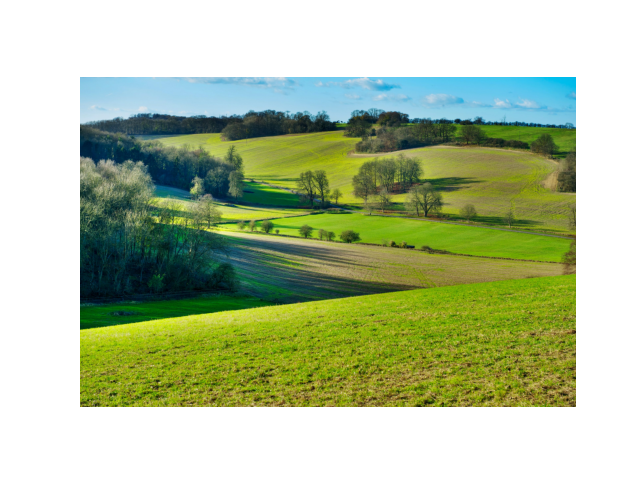

In [8]:
image = io.imread('QML/Gabriel/QnKK_1/imagens/Figure 6.jpeg')

def plot_image(image):
    plt.figure()
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    
plot_image(image)

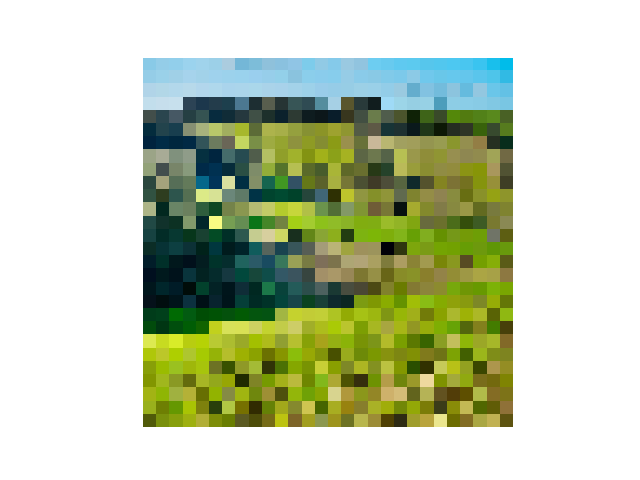

In [9]:
rescaled_image = transform.resize(image, (28, 28), anti_aliasing=False)

plot_image(rescaled_image)

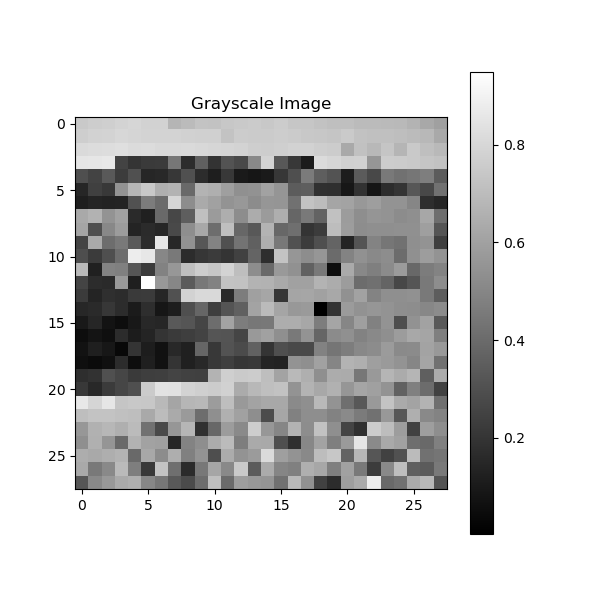

In [16]:
gray_image = color.rgb2gray(rescaled_image)

plt.figure(figsize=(6, 6))
plt.imshow(gray_image, cmap='gray')
plt.colorbar()
plt.title('Grayscale Image')
plt.show()

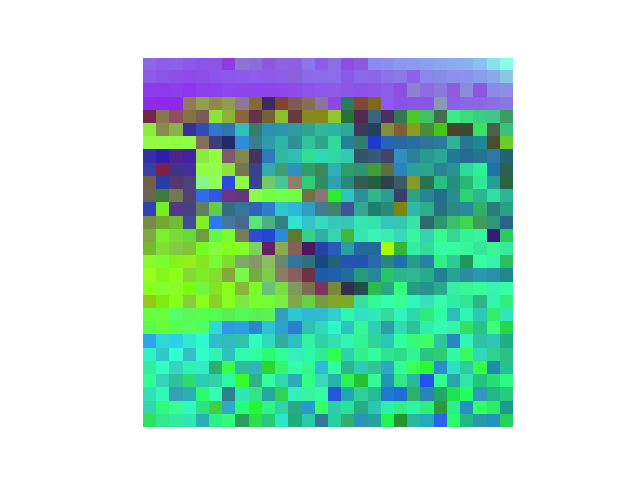

In [11]:
hsv_image = color.rgb2hsv(rescaled_image)

plot_image(hsv_image)

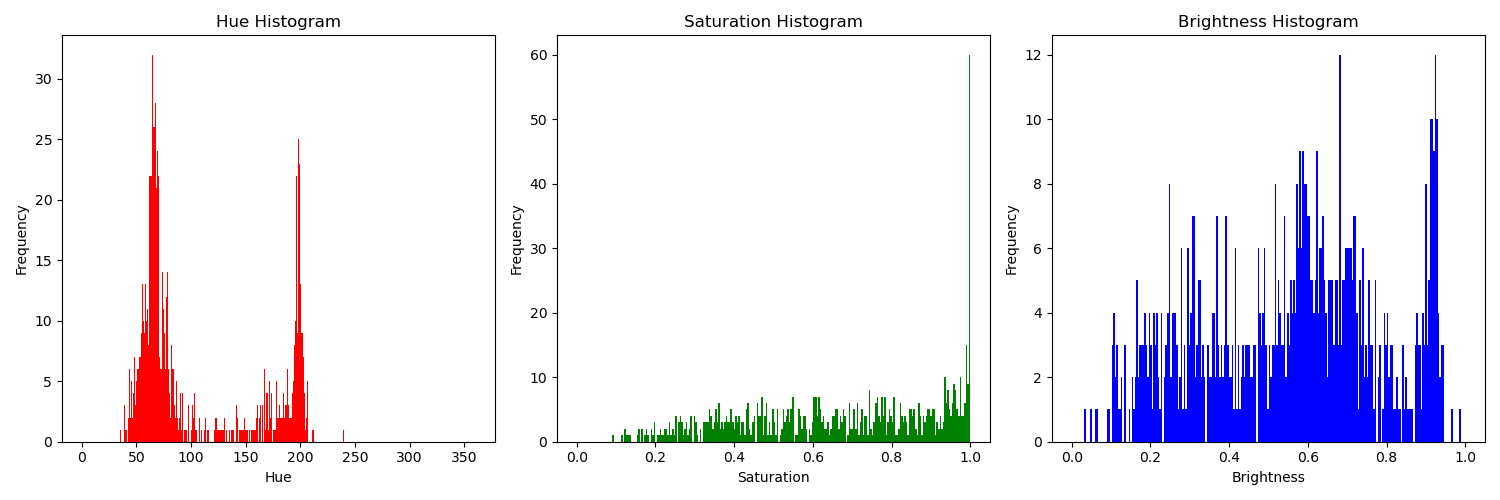

In [12]:
hue = hsv_image[:, :, 0]* 360
saturation = hsv_image[:, :, 1]
brightness = hsv_image[:, :, 2]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].hist(hue.ravel(), bins=360, range=(0, 360), color='r')
axes[0].set_title('Hue Histogram')
axes[0].set_xlabel('Hue')
axes[0].set_ylabel('Frequency')

axes[1].hist(saturation.ravel(), bins=256, range=(0, 1), color='g')
axes[1].set_title('Saturation Histogram')
axes[1].set_xlabel('Saturation')
axes[1].set_ylabel('Frequency')

axes[2].hist(brightness.ravel(), bins=256, range=(0, 1), color='b')
axes[2].set_title('Brightness Histogram')
axes[2].set_xlabel('Brightness')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

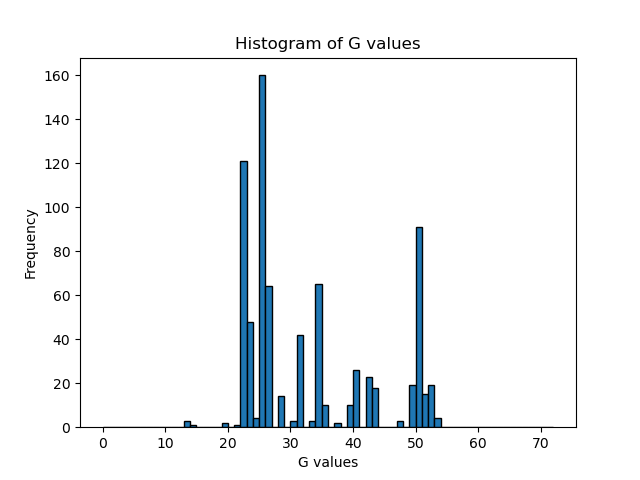

In [13]:
def quantize_h(hue):
    switch = {
        (0, 20): 0,
        (316, 359): 0,
        (21, 40): 1,
        (41, 75): 2,
        (76, 155): 3,
        (156, 190): 4,
        (191, 270): 5,
        (271, 295): 6,
        (296, 315): 7,
    }
    for (lower, upper), value in switch.items():
        if lower <= hue <= upper:
            return value
    return -1

def quantize_s(saturation):
    if saturation <= 0.2:
        return 0
    elif saturation <= 0.7:
        return 1
    return 2

def quantize_b(brightness):
    if brightness <= 0.2:
        return 0
    elif brightness <= 0.7:
        return 1
    return 2


h_quantized = np.vectorize(quantize_h)(hue)
s_quantized = np.vectorize(quantize_s)(saturation)
b_quantized = np.vectorize(quantize_b)(brightness)


Q_h = 9 
Q_s = 3
G = h_quantized * Q_h + s_quantized * Q_s + b_quantized

plt.figure()
plt.hist(G.ravel(), bins=np.arange(73), edgecolor='black')  
plt.title('Histogram of G values')
plt.xlabel('G values')
plt.ylabel('Frequency')
plt.show()

In [26]:
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
gray_image_uint = (gray_image).astype(np.uint8)
glcm = graycomatrix(gray_image_uint, distances=[1], angles=angles, levels=4)

glcm_0_1 = glcm[:, :, 0, 0]  
glcm_neg1_1 = glcm[:, :, 0, 1] 
glcm_neg1_0 = glcm[:, :, 0, 2] 
glcm_neg1_neg1 = glcm[:, :, 0, 3]  

print("GLCM for direction [0, 1]:\n", glcm_0_1)
print("GLCM for direction [-1, 1]:\n", glcm_neg1_1)
print("GLCM for direction [-1, 0]:\n", glcm_neg1_0)
print("GLCM for direction [-1, -1]:\n", glcm_neg1_neg1)

print("Dimensions of GLCM for direction [0, 1]:", glcm_0_1.shape)
print("Dimensions of GLCM for direction [-1, 1]:", glcm_neg1_1.shape)
print("Dimensions of GLCM for direction [-1, 0]:", glcm_neg1_0.shape)
print("Dimensions of GLCM for direction [-1, -1]:", glcm_neg1_neg1.shape)


GLCM for direction [0, 1]:
 [[756   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]]
GLCM for direction [-1, 1]:
 [[729   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]]
GLCM for direction [-1, 0]:
 [[756   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]]
GLCM for direction [-1, -1]:
 [[729   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]]
Dimensions of GLCM for direction [0, 1]: (4, 4)
Dimensions of GLCM for direction [-1, 1]: (4, 4)
Dimensions of GLCM for direction [-1, 0]: (4, 4)
Dimensions of GLCM for direction [-1, -1]: (4, 4)


In [23]:
glcm_0_1_df = pd.DataFrame(glcm_0_1)

glcm_0_1_df

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
non_zero_indices = np.nonzero(glcm_0_1)
non_zero_pairs = list(zip(non_zero_indices[0], non_zero_indices[1]))
non_zero_pairs

[(0, 0)]

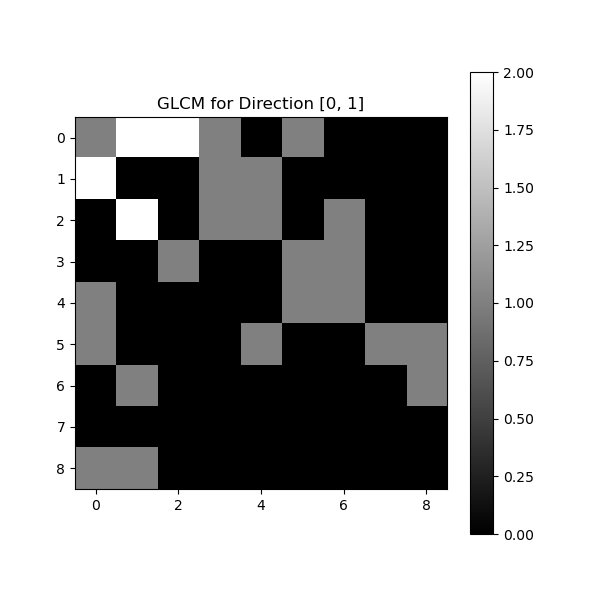

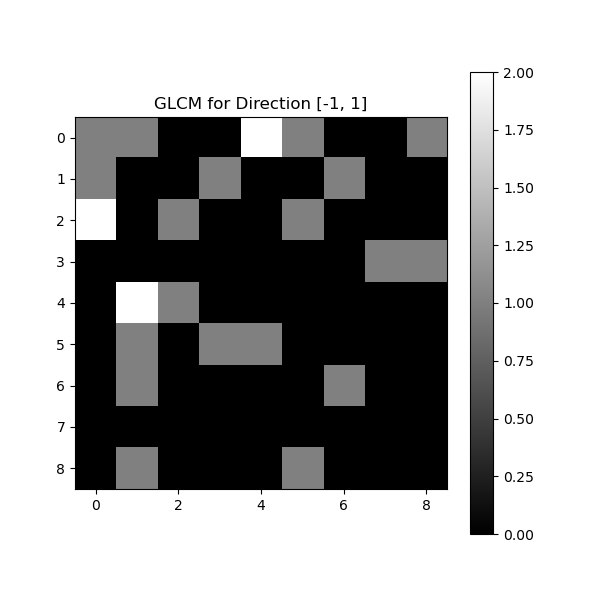

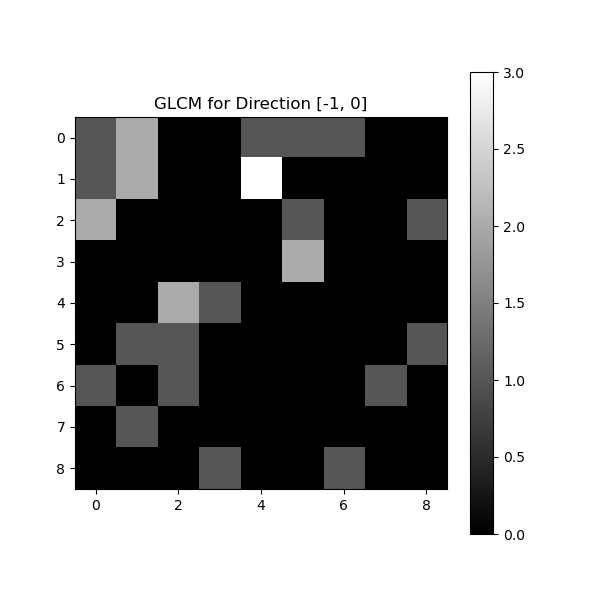

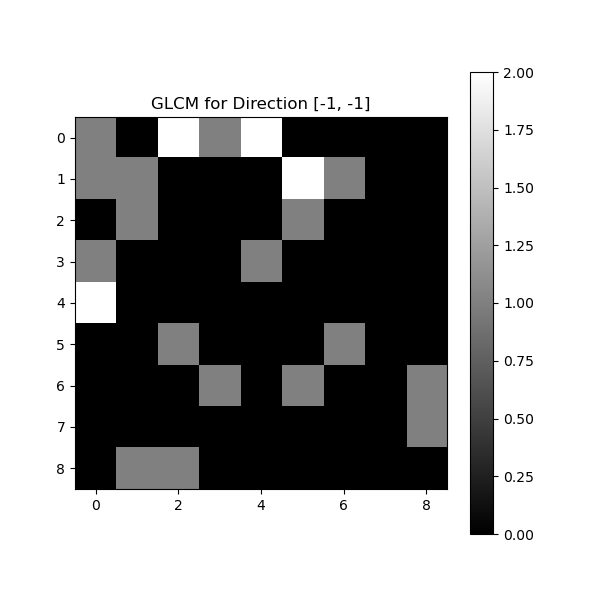

In [34]:
image = np.array([
    [1, 0, 0, 2, 3, 6],
    [4, 0, 1, 0, 5, 7],
    [2, 1, 4, 6, 8, 1],
    [5, 0, 3, 2, 6, 1],
    [2, 4, 5, 8, 0, 1],
    [0, 2, 1, 3, 5, 4]
], dtype=np.uint8)
result = graycomatrix(image, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4], levels=9)

directions = [0, np.pi/4, np.pi/2, 3*np.pi/4]
titles = ['Direction [0, 1]', 'Direction [-1, 1]', 'Direction [-1, 0]', 'Direction [-1, -1]']

for i, (direction, title) in enumerate(zip(directions, titles)):
    plt.figure(figsize=(6, 6))
    plt.imshow(result[:, :, 0, i], cmap='gray')
    plt.colorbar()
    plt.title(f'GLCM for {title}')
    plt.show()

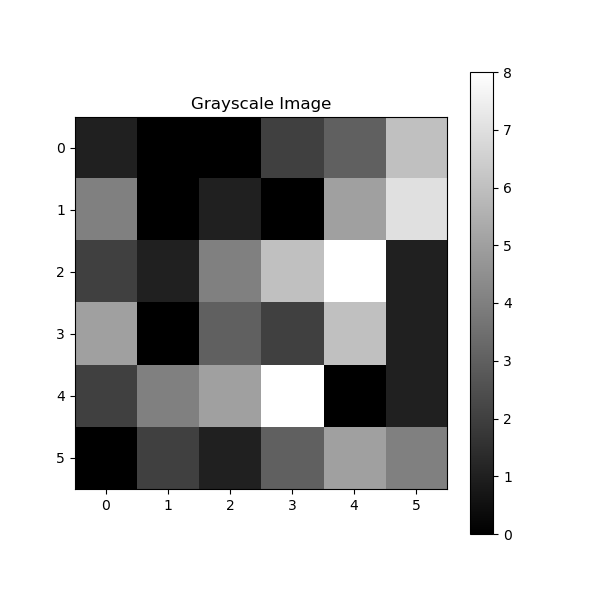

In [35]:
plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')
plt.colorbar()
plt.title(f'Grayscale Image')
plt.show()